# Reading Keywords from the Dataset

Topics/Keywords: climate change, environment, sustainability, pollution, global warming, sea level rise, climate

## Import Packages

In [2]:
import Config as CON
import os
import sys
import random
import json
import time
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import string

#Declare some necessary global functions and objects
current_time_ms = lambda: int(round(time.time() * 1000))

In [3]:
#Update with your local file path
output_filename = os.path.join(CON.OUTPUT_DATA_DIRECTORY,"all_abstracts_with_keywords.json")
assert(os.path.exists(output_filename))

with open(output_filename, encoding='utf-8') as f:
    all_abstracts = json.loads(f.read())

#all_abstracts will be a list of dictionaries. Each dictionary is of the following form: 
#{"keywords": ["x1", "x2", ..., "xn"], "abstract":"full_text_of_abstract"}

print("Number of article abstracts: %d\n"%(len(all_abstracts)))
print("Sample entries:")
print("="*10)
print(all_abstracts[0])
print("="*10)
print(all_abstracts[len(all_abstracts)-1])

#Iterating through the abstracts
print("Loop through the list\n")
stop_after = 5
i = 0

for abstract_with_keywords in all_abstracts:
    keywords = abstract_with_keywords["keywords"]
    print("Keywords: ")
    print(keywords)
    
    print("Abstract: ")
    abstract = abstract_with_keywords["abstract"]
    print(abstract)
    i +=1
    
    if i==stop_after:
        break

Number of article abstracts: 228860

Sample entries:
{'keywords': ['green maintenance', 'data inventory', 'decision making', 'maintenance environment impact evaluation', 'maintenance', 'life cycle assessment', 'environment impact analysis', 'lca', 'maintenance activity', 'maintenance engineering', 'maintenance event', 'analytic hierarchy process', 'materials', 'impact evaluation', 'water pollution'], 'abstract': 'LCA (Life Cycle Assessment) method is adopted and data inventory of maintenance event is gotten through collecting input and output of each maintenance activity based on decomposing maintenance event. Then data types and environment impact types of maintenance event are classified. Environment impact degree of maintenance is quantified by using Analytic Hierarchy Process method. Finally key impact factors are described and measures are presented to reduce environment impact of maintenance activity and realize green maintenance.'}
{'keywords': ['global climate model', 'seasonal

# List Top Keywords

In [4]:
input_filename = os.path.join(CON.OUTPUT_DATA_DIRECTORY,"all_abstracts_with_keywords.json")
assert(os.path.exists(input_filename))

all_abstracts = []

with open(input_filename, encoding='utf-8') as f:
    all_abstracts = json.loads(f.read())

#all_abstracts will be a list of dictionaries. Each dictionary is of the following form: 
#{"keywords": ["x1", "x2", ..., "xn"], "abstract":"full_text_of_abstract"}

keyword_frequency = {}
keyword_co_matrix = {}

for abstract_with_keywords in all_abstracts:
    keywords = abstract_with_keywords["keywords"]
    for x in keywords:
        x = x.strip().lower()
        if x in keyword_frequency.keys():
            keyword_frequency[x] +=1
        else:
            keyword_frequency[x] = 1
            
keyword_freq_sorted = dict(sorted(keyword_frequency.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)[0:50])
top_keywords = keyword_freq_sorted.keys()

for x in keyword_freq_sorted.keys():
    keyword_co_matrix[x] = {}
    for y in top_keywords:
        keyword_co_matrix[x][y] = 0


for abstract_with_keywords in all_abstracts:
    keywords = [x.strip() for x in abstract_with_keywords["keywords"] if x.strip() in top_keywords]
    #print(keywords)
    #print(keyword_co_matrix)
    
    l = len(keywords)
    for i in range(0,l):
        for j in range(i+1,l):
            if keywords[i]==keywords[j]:
                continue
            #print(keywords[i])
            #print(keywords[j])
            keyword_co_matrix[keywords[i]][keywords[j]] +=1
            keyword_co_matrix[keywords[j]][keywords[i]] +=1
            #print(keyword_co_matrix[keywords[i]][keywords[j]])

#print(keyword_co_matrix)

In [5]:
#Uncomment if you are running it the first time
#!pip install --user networkx

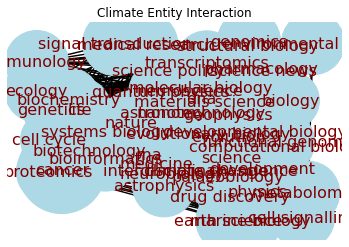

In [6]:
"""
An example of drawing a weighted graph using the NetworkX module
This is sample code and not indicative of how Qxf2 writes Python code
 
---------------
I. The problem:
---------------
I will be plotting how often these four world chess champions played each other:
a) Anatoly Karpov
b) Gary Kasparov
c) Vladimir Kramnik
d) Vishwanathan Anand
 
-------------------------
II. Technical references: 
-------------------------
1. https://networkx.github.io/documentation/networkx-1.9/examples/drawing/weighted_graph.html
2. https://stackoverflow.com/questions/28372127/add-edge-weights-to-plot-output-in-networkx
 
-----------------------------------------
III. Reference for data (as of Aug 2017):
-----------------------------------------
1. Karpov - Kasparov: 170 classical games
http://www.chessgames.com/perl/chess.pl?pid=15940&amp;pid2=20719
 
2. Karpov - Kramnik: 15 classical games
http://www.chessgames.com/perl/chess.pl?pid=20719&amp;pid2=12295
 
3. Karpov - Anand: 45 classical games
http://www.chessgames.com/perl/chess.pl?pid=20719&amp;pid2=12088
 
4. Kasparov - Kramnik: 49 classical games
http://www.chessgames.com/perl/chess.pl?pid=12295&amp;pid2=15940
 
5. Kasparov - Anand: 51 classical games
http://www.chessgames.com/perl/chess.pl?pid=12088&amp;pid2=15940
 
6. Kramnik - Anand: 91 classical games
http://www.chessgames.com/perl/chess.pl?pid=12295&amp;pid2=12088
"""
 
#1. Import pyplot and nx
import matplotlib.pyplot as plt
import networkx as nx
import random
 
def plot_weighted_graph(keyword_freq_sorted, keyword_co_matrix):
    "Plot a weighted graph"
    #plt.figure(1, figsize=(200, 80), dpi=60)
    #2. Add nodes
    G = nx.Graph() #Create a graph object called G
    
    top_keywords = [x.strip() for x in keyword_freq_sorted.keys()]
    random.shuffle(top_keywords)
    
    for node in top_keywords:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    pos=nx.random_layout(G) 
    #pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_color='lightblue',node_size=[v * 0.1 for v in keyword_freq_sorted.values()])
 
    #3. If you want, add labels to the nodes
    labels = {}
    for node_name in top_keywords:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=16, font_color='maroon')
 
 
    #4. Add the edges (4C2 = 6 combinations)
    #NOTE: You usually read this data in from some source
    #To keep the example self contained, I typed this out
    l = len(keyword_co_matrix)
    
    for i in range(0,l):
        for j in range(i+1,l):
            w = keyword_co_matrix[top_keywords[i]][top_keywords[j]]
            if(w!=0):
                G.add_edge(top_keywords[i], top_keywords[j], weight = w)
 
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
    #print(unique_weights)
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(top_keywords)*30.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
    #Plot the graph
    plt.rcParams["figure.figsize"] = (30,30)
    plt.axis('off')
    plt.title('Climate Entity Interaction')
    plt.savefig("climate_entity_graph.png") 
    plt.show() 

#----START OF SCRIPT
if __name__=='__main__':
    plot_weighted_graph(keyword_freq_sorted, keyword_co_matrix)

In [7]:
print(keyword_co_matrix['climate change'])

{'climate change': 0, 'ecology': 40549, 'environmental science': 40319, 'biology': 40453, 'genetics': 40392, 'bioinformatics': 40418, 'medicine': 40414, 'physics': 40407, 'biotechnology': 40205, 'biochemistry': 40123, 'evolution': 40236, 'dna': 7473, 'nature': 7431, 'earth science': 40381, 'cancer': 40128, 'geophysics': 40147, 'genomics': 40142, 'evolutionary biology': 40181, 'proteomics': 40129, 'marine biology': 40136, 'signal transduction': 40117, 'nanotechnology': 40119, 'rna': 7393, 'molecular biology': 40113, 'materials science': 40112, 'immunology': 40119, 'computational biology': 40121, 'pharmacology': 40117, 'transcriptomics': 40117, 'metabolomics': 40112, 'cell cycle': 40110, 'astrophysics': 40113, 'astronomy': 40113, 'functional genomics': 40117, 'systems biology': 40116, 'developmental biology': 40113, 'medical research': 40110, 'neuroscience': 40111, 'structural biology': 40111, 'drug discovery': 40112, 'quantum physics': 40110, 'neurobiology': 40109, 'palaeobiology': 4010

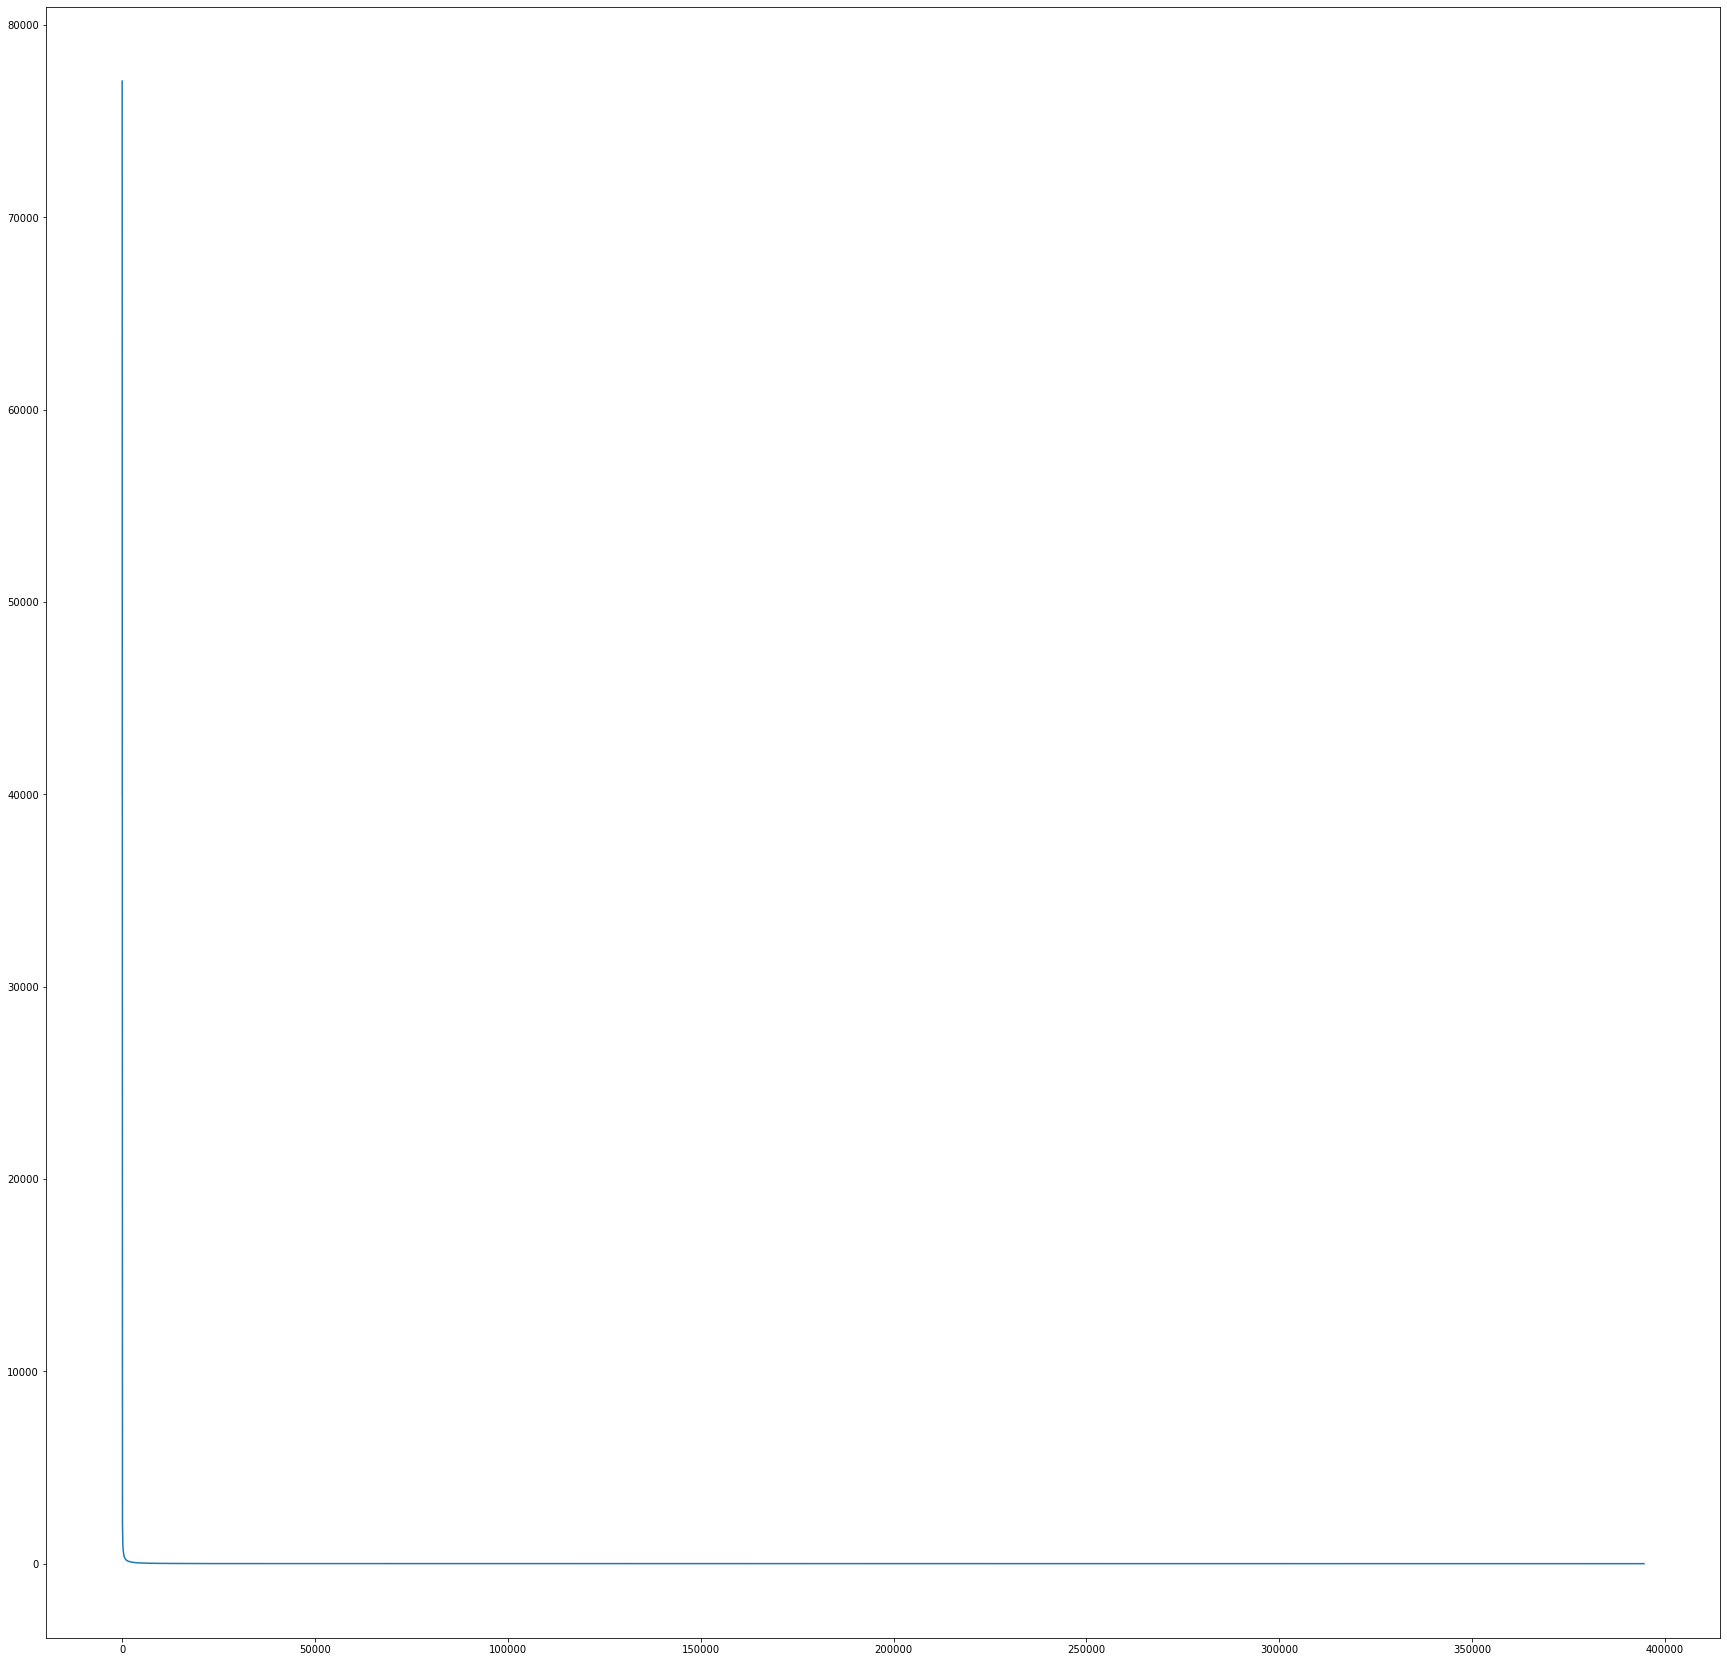

In [11]:
keyword_frequency_v2 = dict(sorted(keyword_frequency.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
i = 0
sum_frequency = 0
freq_list = []

for key in keyword_frequency_v2.keys():
    i +=1
    f = keyword_frequency_v2[key]
    freq_list.append(f)
    sum_frequency += f
    
plt.plot(np.arange(0,len(freq_list)),freq_list)

In [9]:
keyword_frequency = dict(sorted(keyword_frequency.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
with open('keyword_frequency.txt', 'w') as fw:
     fw.write(json.dumps(keyword_frequency))

In [10]:
print(top_keywords)

dict_keys(['climate change', 'ecology', 'environmental science', 'biology', 'genetics', 'bioinformatics', 'medicine', 'physics', 'biotechnology', 'biochemistry', 'evolution', 'dna', 'nature', 'earth science', 'cancer', 'geophysics', 'genomics', 'evolutionary biology', 'proteomics', 'marine biology', 'signal transduction', 'nanotechnology', 'rna', 'molecular biology', 'materials science', 'immunology', 'computational biology', 'pharmacology', 'transcriptomics', 'metabolomics', 'cell cycle', 'astrophysics', 'astronomy', 'functional genomics', 'systems biology', 'developmental biology', 'medical research', 'neuroscience', 'structural biology', 'drug discovery', 'quantum physics', 'neurobiology', 'palaeobiology', 'cell signalling', 'development', 'science', 'science policy', 'life', 'interdisciplinary science', 'science news'])
